In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#show all the columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('ANEXOS_SUBTERRÁNEOS.csv')

In [4]:
df.head(2)

,TÍTULO,CLAVE DE REGIÓN HIDROLÓGICA,NOMBRE DE REGIÓN HIDROLÓGICA,ESTADO,NOMBRE DE ESTADO,CLAVE DE MUNICIPIO,NOMBRE DE MUNICIPIO,CLAVE DE CUENCA HIDROLÓGICA,NOMBRE DE CUENCA HIDROLÓGICA,VOLUMEN ANUAL EN m3,GRADOS LATITUD,MINUTOS LATITUD,SEGUNDOS LATITUD,GRADOS LONGITUD,MINUTOS LONGITUD,SEGUNDOS LONGITUD,CLAVE DE ACUÍFERO QUE MENCIONA EL TÍTULO,ACUÍFERO QUE MENCIONA EL TÍTULO,NÚMERO DE ANEXO,CLAVE DE ACUÍFERO HOMOLOGADO,NOMBRE DE ACUÍFERO HOMOLOGADO
0,810052,12,LERMA-SANTIAGO,14,JALISCO,35,ENCARNACIÓN DE DÍAZ,196,RÍO ENCARNACIÓN,23190.0,21,34,53.0005,102,15,15.0018,0.0,SIN DATO,1,1422.0,ENCARNACIÓN
1,810055,12,LERMA-SANTIAGO,14,JALISCO,93,TEPATITLÁN DE MORELOS,199,RÍO DEL VALLE,100000.0,20,50,46.0556,102,34,30.0630,0.0,SIN DATO,1,1416.0,VALLE DE GUADALUPE


In [5]:
# exploring the spelling of the state's names
df['NOMBRE DE ESTADO'].unique()

array(['JALISCO', 'SAN LUIS POTOSÍ', 'DURANGO', 'YUCATÁN',
       'VERACRUZ DE IGNACIO DE LA LLAVE', 'MICHOACÁN DE OCAMPO',
       'TABASCO', 'CAMPECHE', 'PUEBLA', 'ZACATECAS', 'AGUASCALIENTES',
       'CHIAPAS', 'NUEVO LEÓN', 'MORELOS', 'SINALOA', 'SONORA',
       'QUERÉTARO', 'CHIHUAHUA', 'COLIMA', 'GUANAJUATO',
       'COAHUILA DE ZARAGOZA', 'TAMAULIPAS', 'MÉXICO', 'NAYARIT',
       'BAJA CALIFORNIA', 'GUERRERO', 'HIDALGO', 'BAJA CALIFORNIA SUR',
       'OAXACA', 'QUINTANA ROO', 'TLAXCALA', 'CIUDAD DE MÉXICO'],
      dtype=object)

In [6]:
# filter rows for 'CIUDAD DE MÉXICO' from 'NOMBRE DE ESTADO' column
df_cdmx = df[df['NOMBRE DE ESTADO'] == 'CIUDAD DE MÉXICO'] 

In [7]:
df_concesiones = pd.read_csv('CONCESIONES.csv')

In [8]:
df_concesiones.head(2)

,TÍTULO,USO QUE AMPARA EL TÍTULO,TITULAR,VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3,APROVECHAMIENTOS SUPERFICIALES QUE AMPARA EL TÍTULO,VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUPERFICIALES EN m3,APROVECHAMIENTOS SUBTERRÁNEOS QUE AMPARA EL TÍTULO,VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUBTERRÁNEOS EN m3,PUNTOS DE DESCARGA QUE AMPARA EL TÍTULO,VOLUMEN DE DESCARGA DIARIO EN m3,ZONAS FEDERALES QUE AMPARA EL TÍTULO,SUPERFICIE EN m2,FECHA DE REGISTRO,AUTORIDAD QUE EMITE EL ACTO
0,810052,DIFERENTES USOS,"VICTOR DE SANTOS GARCIA, MA. ELENA GONZALEZ RO...",23190.0,0,0.0,1,23190.0,0,0.0,0,0.0,2019-08-06,ORGANISMO DE CUENCA LERMA SANTIAGO PACIFICO
1,810055,AGRÍCOLA,"ANTONIO MARTIN GOMEZ, MARIA GUADALUPE GOMEZ GOMEZ",100000.0,0,0.0,1,100000.0,0,0.0,0,0.0,2020-05-29,ORGANISMO DE CUENCA LERMA SANTIAGO PACIFICO


In [9]:
# correct column name in order to marge with 'df_cdmx'
df_concesiones.rename(columns={"TÍTULO": "TÍTULO"}, inplace=True)

In [10]:
df_cdmx_concesns = pd.merge(df_cdmx, df_concesiones,how='left', on='TÍTULO')

In [11]:
df_cdmx_concesns.head(2)

,TÍTULO,CLAVE DE REGIÓN HIDROLÓGICA,NOMBRE DE REGIÓN HIDROLÓGICA,ESTADO,NOMBRE DE ESTADO,CLAVE DE MUNICIPIO,NOMBRE DE MUNICIPIO,CLAVE DE CUENCA HIDROLÓGICA,NOMBRE DE CUENCA HIDROLÓGICA,VOLUMEN ANUAL EN m3,GRADOS LATITUD,MINUTOS LATITUD,SEGUNDOS LATITUD,GRADOS LONGITUD,MINUTOS LONGITUD,SEGUNDOS LONGITUD,CLAVE DE ACUÍFERO QUE MENCIONA EL TÍTULO,ACUÍFERO QUE MENCIONA EL TÍTULO,NÚMERO DE ANEXO,CLAVE DE ACUÍFERO HOMOLOGADO,NOMBRE DE ACUÍFERO HOMOLOGADO,USO QUE AMPARA EL TÍTULO,TITULAR,VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3,APROVECHAMIENTOS SUPERFICIALES QUE AMPARA EL TÍTULO,VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUPERFICIALES EN m3,APROVECHAMIENTOS SUBTERRÁNEOS QUE AMPARA EL TÍTULO,VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUBTERRÁNEOS EN m3,PUNTOS DE DESCARGA QUE AMPARA EL TÍTULO,VOLUMEN DE DESCARGA DIARIO EN m3,ZONAS FEDERALES QUE AMPARA EL TÍTULO,SUPERFICIE EN m2,FECHA DE REGISTRO,AUTORIDAD QUE EMITE EL ACTO
0,811078,26,PÁNUCO,9,CIUDAD DE MÉXICO,3,COYOACÁN,550,XOCHIMILCO,450000.0,19,18,14.2096,99,9,18.0193,0.0,SIN DATO,1,901.0,ZONA METROPOLITANA DE LA CD. DE MÉXICO,SERVICIOS,"TELEVISA, S.A. DE C.V.",450000.0,0,0.0,1,450000.0,0,0.0,0,0.0,2019-06-27,ORGANISMO DE CUENCA AGUAS DEL VALLE DE MEXICO
1,812118,26,PÁNUCO,9,CIUDAD DE MÉXICO,10,ÁLVARO OBREGÓN,555,CIUDAD DE MÉXICO,200000.0,19,22,48.0182,99,15,9.0144,0.0,SIN DATO,1,901.0,ZONA METROPOLITANA DE LA CD. DE MÉXICO,SERVICIOS,"CAPRICHO HABITACIONAL, S.A. DE C.V.",765000.0,0,0.0,2,765000.0,0,0.0,0,0.0,2022-12-12,ORGANISMO DE CUENCA AGUAS DEL VALLE DE MEXICO


In [12]:
# convert coordinates from DMS (degree, minute, second) to decimal degrees

df_cdmx_concesns["lat_decimal"] = df_cdmx_concesns[["GRADOS LATITUD","MINUTOS LATITUD","SEGUNDOS LATITUD"]].apply(lambda row: row.values[0] + row.values[1]/60 + row.values[2]/3600, axis=1)
df_cdmx_concesns["lon_decimal"] = df_cdmx_concesns[["GRADOS LONGITUD","MINUTOS LONGITUD","SEGUNDOS LONGITUD"]].apply(lambda row: row.values[0] + row.values[1]/60 + row.values[2]/3600, axis=1)

In [13]:
df_cdmx_concesns.head(2)

,TÍTULO,CLAVE DE REGIÓN HIDROLÓGICA,NOMBRE DE REGIÓN HIDROLÓGICA,ESTADO,NOMBRE DE ESTADO,CLAVE DE MUNICIPIO,NOMBRE DE MUNICIPIO,CLAVE DE CUENCA HIDROLÓGICA,NOMBRE DE CUENCA HIDROLÓGICA,VOLUMEN ANUAL EN m3,GRADOS LATITUD,MINUTOS LATITUD,SEGUNDOS LATITUD,GRADOS LONGITUD,MINUTOS LONGITUD,SEGUNDOS LONGITUD,CLAVE DE ACUÍFERO QUE MENCIONA EL TÍTULO,ACUÍFERO QUE MENCIONA EL TÍTULO,NÚMERO DE ANEXO,CLAVE DE ACUÍFERO HOMOLOGADO,NOMBRE DE ACUÍFERO HOMOLOGADO,USO QUE AMPARA EL TÍTULO,TITULAR,VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3,APROVECHAMIENTOS SUPERFICIALES QUE AMPARA EL TÍTULO,VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUPERFICIALES EN m3,APROVECHAMIENTOS SUBTERRÁNEOS QUE AMPARA EL TÍTULO,VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUBTERRÁNEOS EN m3,PUNTOS DE DESCARGA QUE AMPARA EL TÍTULO,VOLUMEN DE DESCARGA DIARIO EN m3,ZONAS FEDERALES QUE AMPARA EL TÍTULO,SUPERFICIE EN m2,FECHA DE REGISTRO,AUTORIDAD QUE EMITE EL ACTO,lat_decimal,lon_decimal
0,811078,26,PÁNUCO,9,CIUDAD DE MÉXICO,3,COYOACÁN,550,XOCHIMILCO,450000.0,19,18,14.2096,99,9,18.0193,0.0,SIN DATO,1,901.0,ZONA METROPOLITANA DE LA CD. DE MÉXICO,SERVICIOS,"TELEVISA, S.A. DE C.V.",450000.0,0,0.0,1,450000.0,0,0.0,0,0.0,2019-06-27,ORGANISMO DE CUENCA AGUAS DEL VALLE DE MEXICO,19.303947,99.155005
1,812118,26,PÁNUCO,9,CIUDAD DE MÉXICO,10,ÁLVARO OBREGÓN,555,CIUDAD DE MÉXICO,200000.0,19,22,48.0182,99,15,9.0144,0.0,SIN DATO,1,901.0,ZONA METROPOLITANA DE LA CD. DE MÉXICO,SERVICIOS,"CAPRICHO HABITACIONAL, S.A. DE C.V.",765000.0,0,0.0,2,765000.0,0,0.0,0,0.0,2022-12-12,ORGANISMO DE CUENCA AGUAS DEL VALLE DE MEXICO,19.380005,99.252504


In [14]:
# exploring the spelling of the municipalities' names
df_cdmx_concesns['NOMBRE DE MUNICIPIO'].unique()

array(['COYOACÁN', 'ÁLVARO OBREGÓN', 'MIGUEL HIDALGO', 'CUAUHTÉMOC',
       'AZCAPOTZALCO', 'GUSTAVO A. MADERO', 'IZTACALCO', 'IZTAPALAPA',
       'TLALPAN', 'BENITO JUÁREZ', 'TLÁHUAC', 'VENUSTIANO CARRANZA',
       'XOCHIMILCO', 'MILPA ALTA', 'LA MAGDALENA CONTRERAS',
       'CUAJIMALPA DE MORELOS'], dtype=object)

In [15]:
# selecting most useful columns
df_useful_cols = df_cdmx_concesns[['FECHA DE REGISTRO','lon_decimal','lat_decimal','VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUBTERRÁNEOS EN m3','TITULAR','USO QUE AMPARA EL TÍTULO','NOMBRE DE MUNICIPIO']] 

In [16]:
df_useful_cols.head(2)

,FECHA DE REGISTRO,lon_decimal,lat_decimal,VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUBTERRÁNEOS EN m3,TITULAR,USO QUE AMPARA EL TÍTULO,NOMBRE DE MUNICIPIO
0,2019-06-27,99.155005,19.303947,450000.0,"TELEVISA, S.A. DE C.V.",SERVICIOS,COYOACÁN
1,2022-12-12,99.252504,19.380005,765000.0,"CAPRICHO HABITACIONAL, S.A. DE C.V.",SERVICIOS,ÁLVARO OBREGÓN


In [17]:
# changing columns' names
df_useful_cols.columns = ["Registration_date", "Longitude", "Latitude","Annual_underground_extraction_m3","Entitlement","Permited_use","Municipality_name"]


In [18]:
# Longitude column is assuming degrees in west direction
# This step transforms the column to negative values to avoid specifying the direction
df_useful_cols['Longitude'] = df_useful_cols['Longitude'] * -1

/tmp/ipykernel_10779/4287188232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful_cols['Longitude'] = df_useful_cols['Longitude'] * -1


In [19]:
# these two errors were identified when the final csv file was the input for a map visualization using Power BI 
df_useful_cols[df_useful_cols['Latitude']<19]

,Registration_date,Longitude,Latitude,Annual_underground_extraction_m3,Entitlement,Permited_use,Municipality_name
74,1997-10-21,-99.151111,0.4475,8295.0,FERROCARRILES NACIONALES DE MEXICO,SERVICIOS,IZTACALCO
116,1994-12-05,-0.000000,0.0000,241.0,"PHILIPS MEXICANA, S.A. DE C.V.",INDUSTRIAL,AZCAPOTZALCO


In [20]:
# The 'latitude' error in row number 74 is very likely to be simply missing the number "19" before the decimals.
#
# Row number 116 has no coordinates, but this well is registered at Azcapotzalco Municipality.
# After some research, it was found information from the Economy Ministry about a Philips stablishment at 'Norte 45' street,
# which is located in Azcapotzalco. So, the coordinates assigned are the ones from the middle point of the lenght of the street.
df_useful_cols['Latitude'].replace({0.4475:19.4475, 0.0000: 19.4920},inplace=True)

/tmp/ipykernel_10779/3930155740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful_cols['Latitude'].replace({0.4475:19.4475, 0.0000: 19.4920},inplace=True)


In [21]:
df_useful_cols['Longitude'].replace({0.0000:-99.1600},inplace=True)

/tmp/ipykernel_10779/4128700051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful_cols['Longitude'].replace({0.0000:-99.1600},inplace=True)


In [22]:
# new column to extract the year
df_useful_cols['Year'] = pd.DatetimeIndex(df_useful_cols['Registration_date']).year

/tmp/ipykernel_10779/2171723593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful_cols['Year'] = pd.DatetimeIndex(df_useful_cols['Registration_date']).year


In [23]:
# number of wells by year
df_useful_cols.Year.value_counts().sort_index()

1994     21
1995     51
1996    611
1997     18
1998      5
1999     18
2000      2
2001      3
2002      1
2003      2
2004      5
2005      1
2007      3
2008      4
2009      4
2010      1
2011      2
2012      3
2013      4
2017      3
2018      4
2019      3
2020      1
2021      9
2022      9
2023      1
Name: Year, dtype: int64

In [43]:
# exploring the data only from the water service of the city
df_sacmex = df_useful_cols[df_useful_cols['Entitlement'] == 'SISTEMA DE AGUAS DE LA CIUDAD DE MEXICO']

In [45]:
# exploring number of wells from the water service of the city by year
df_sacmex.Year.value_counts().sort_index()

1996    550
Name: Year, dtype: int64

In [28]:
# comparing number of wells by the water service of the city from the whole data of Mexico City
df_useful_cols['Entitlement'].value_counts()['SISTEMA DE AGUAS DE LA CIUDAD DE MEXICO']

550

In [24]:
# wells since 2000
df_wells_2000 = df_useful_cols[df_useful_cols['Year']>1999]

<AxesSubplot:>

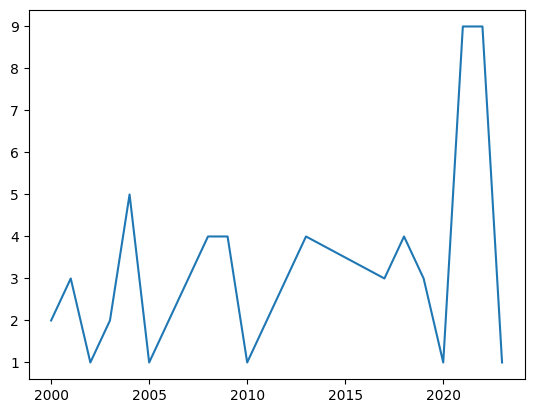

In [25]:
# visualization of new wells by year since 2000
df_wells_2000.Year.value_counts().sort_index().plot()

In [26]:
cdmx_pozos = df_useful_cols.copy()

In [27]:
# erase "#" in the line below to export as csv file

import os  
#cdmx_pozos.to_csv('cdmx_pozos.csv')